In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':[9,9]},font_scale = 1.2)


<b><font size=5>Dataset downloaded: https://www.kaggle.com/trolukovich/riga-real-estate-dataset</font></b>


<b><font size=5>Data info:</font></b>
<ol>

<li><font color= 'green'><b>op_type</b></font> - offer type ('For rent', 'For sale', 'Buying', 'Renting', 'Change', 'Other').
<li><font color= 'green'><b>district</b></font> - district, where real estate object located.
<li><font color= 'green'><b>street</b></font> - address of real estate object.
<li><font color= 'green'><b>rooms</b></font> - number of rooms.
<li><font color= 'green'><b>area</b></font> - living area of real estate object.
<li><font color= 'green'><b>floor</b></font> - floor of rel estate object.
<li><font color= 'green'><b>total_floors</b></font> - total amount of floors in building.
<li><font color= 'green'><b>house_seria</b></font> - house design ('LT proj.', '602.', 'P. kara', 'Jaun.', 'Specpr.', 'Hrušč.', '119.', 'M. ģim.', 'Renov.', '103.', nan, 'Priv. m.', '467.', 'Staļina', '104.', 'Čehu pr.').
<li><font color= 'green'><b>house_type</b></font> - type of building ('Brick-Panel', 'Panel', 'Wood', 'Masonry', 'Brick', 'Panel-Brick').
<li><font color= 'green'><b>condition</b></font> - stuffing premises ('All amenities', 'Partial amenities', 'Without amenities').
<li><font color= 'green'><b>price</b></font> - price in EUR.
<li><font color= 'green'><b>lat / lon</b></font> - latitude and longitude of real estate object.
</ol>


In [2]:
df = pd.read_csv('riga_re.csv')
df

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,For rent,Āgenskalns,Elvīras 13a,1,30.0,4.0,5.0,LT proj.,Panel,All amenities,250.0,56.946360,24.053976
4685,For rent,Daugavgrīva,Birzes 32,1,32.0,2.0,5.0,103.,Brick-Panel,All amenities,180.0,57.037321,24.029662
4686,For sale,Purvciems,Vaidavas 2,2,43.0,5.0,5.0,Hrušč.,Brick,Partial amenities,44850.0,56.965118,24.176048
4687,For sale,Čiekurkalns,Čiekurkalna 7. šķ l. 3k2,1,18.0,1.0,2.0,Renov.,Brick,All amenities,10445.0,NaN,NaN


<font size=5 color=green><b>Data pre-processing, checking for null values and missing data.</b></font>

In [3]:
df.isna().sum()

op_type           0
district         15
street          452
rooms           189
area            364
floor           333
total_floors    344
house_seria     442
house_type      450
condition       406
price           470
lat             207
lon             207
dtype: int64

<font size=5 color=green><b>Removing un-necessary columns, columns which are useless for analysis and business</b></font>

<font size=5 color=red><b>-Important: The column district for me is actually a necessary attribute and could provide useful information in analysis, but in an older version of this project I tried full analysis and machine model while having the "district" column, this column contained more than 15 different types of districts. The final result was terrible in machine model, it resulted in 58 total columns, the rest of dataset columns included. The machine model resulted from a negative accuracy to 20% max accuracy which was terrible, removing this column resulted in a better accuracy.</b></font>

In [4]:
df = df.drop(['district','street','house_seria','lat', 'lon'], axis =1)
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,All amenities,250.0
1,For rent,2,50.0,7.0,9.0,Panel,All amenities,300.0
2,For sale,2,33.0,1.0,2.0,Wood,Partial amenities,13500.0
3,For sale,2,50.0,5.0,5.0,Panel,All amenities,34000.0
4,For rent,3,76.0,3.0,12.0,Masonry,All amenities,490.0
...,...,...,...,...,...,...,...,...
4684,For rent,1,30.0,4.0,5.0,Panel,All amenities,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,All amenities,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,Partial amenities,44850.0
4687,For sale,1,18.0,1.0,2.0,Brick,All amenities,10445.0


In [5]:
df['rooms'].unique()

array(['1', '2', '3', '4', 'Citi', nan, '5', '6'], dtype=object)

<font size=5 color=green><b>Removing null values as they are only a small amount, using imputer/other methods is not necessary</b></font>

In [6]:
df = df.dropna()
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,All amenities,250.0
1,For rent,2,50.0,7.0,9.0,Panel,All amenities,300.0
2,For sale,2,33.0,1.0,2.0,Wood,Partial amenities,13500.0
3,For sale,2,50.0,5.0,5.0,Panel,All amenities,34000.0
4,For rent,3,76.0,3.0,12.0,Masonry,All amenities,490.0
...,...,...,...,...,...,...,...,...
4684,For rent,1,30.0,4.0,5.0,Panel,All amenities,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,All amenities,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,Partial amenities,44850.0
4687,For sale,1,18.0,1.0,2.0,Brick,All amenities,10445.0


<font size=5 color=green><b>Noticed that the column named "rooms" is object format although the column is full of integers, after looking into it found there is a value called "citi" which does not make sense, so after removing it I switched the column back to int64 data type.</b></font>

In [7]:
df [ df['rooms'] == 'Citi'].index

Int64Index([79, 315, 384, 535, 605, 884, 1579, 2010, 2039, 2212, 2622, 3460,
            3511, 3662],
           dtype='int64')

In [8]:
df = df.drop(df [ df['rooms'] == 'Citi'].index)
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,All amenities,250.0
1,For rent,2,50.0,7.0,9.0,Panel,All amenities,300.0
2,For sale,2,33.0,1.0,2.0,Wood,Partial amenities,13500.0
3,For sale,2,50.0,5.0,5.0,Panel,All amenities,34000.0
4,For rent,3,76.0,3.0,12.0,Masonry,All amenities,490.0
...,...,...,...,...,...,...,...,...
4684,For rent,1,30.0,4.0,5.0,Panel,All amenities,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,All amenities,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,Partial amenities,44850.0
4687,For sale,1,18.0,1.0,2.0,Brick,All amenities,10445.0


In [9]:
df['rooms'] = df['rooms'].astype(np.int64)
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,All amenities,250.0
1,For rent,2,50.0,7.0,9.0,Panel,All amenities,300.0
2,For sale,2,33.0,1.0,2.0,Wood,Partial amenities,13500.0
3,For sale,2,50.0,5.0,5.0,Panel,All amenities,34000.0
4,For rent,3,76.0,3.0,12.0,Masonry,All amenities,490.0
...,...,...,...,...,...,...,...,...
4684,For rent,1,30.0,4.0,5.0,Panel,All amenities,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,All amenities,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,Partial amenities,44850.0
4687,For sale,1,18.0,1.0,2.0,Brick,All amenities,10445.0


<font size=5 color=green><b>Data after being cleaned and pre-processed</b></font>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4197 entries, 0 to 4688
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   op_type       4197 non-null   object 
 1   rooms         4197 non-null   int64  
 2   area          4197 non-null   float64
 3   floor         4197 non-null   float64
 4   total_floors  4197 non-null   float64
 5   house_type    4197 non-null   object 
 6   condition     4197 non-null   object 
 7   price         4197 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 295.1+ KB


<font size=5 color=green><b>Created a function, giving it a dataframe and column name which picks out the outlier in the specified column and returns the outlier values</b></font>

In [11]:
def get_outlier(data, col):
    q1 = data[col].quantile(.25)
    q3 = data[col].quantile(.75)
    iqr = q3 - q1
    min_wisk = q1 - 1.5 * iqr
    max_wisk = q3 + 1.5 * iqr
    outlier = data[ ~data[col].between(min_wisk,max_wisk)]
    return outlier

<font size=5 color=green><b>List of numerical columns which loops on each column, calls the function to detect the outliers and removes them.</b></font>

In [12]:
outlier_col = ['rooms', 'area', 'floor', 'total_floors', 'price']
for outlier in outlier_col:
    outliers = get_outlier(df, outlier)
    df = df.drop(outliers.index, axis=0)
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,All amenities,250.0
3,For sale,2,50.0,5.0,5.0,Panel,All amenities,34000.0
5,For rent,2,40.0,3.0,6.0,Masonry,All amenities,440.0
6,For sale,2,37.0,5.0,5.0,Brick,All amenities,31000.0
7,For rent,2,49.0,3.0,5.0,Panel,All amenities,240.0
...,...,...,...,...,...,...,...,...
4683,For sale,1,34.0,3.0,4.0,Brick,Partial amenities,35000.0
4684,For rent,1,30.0,4.0,5.0,Panel,All amenities,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,All amenities,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,Partial amenities,44850.0


<font size=5 color=green><b>Grouping all the prices of houses for sale, for rent...etc</b></font>

In [13]:
df.groupby("op_type").sum()['price']

op_type
Change          45060.0
For rent       371733.0
For sale    115645630.0
Other              10.0
Renting           500.0
Name: price, dtype: float64

<font size=5 color=green><b>Plotting a graph for the area, adding categorical hue value "rooms" to highlight the area of rooms</b></font>

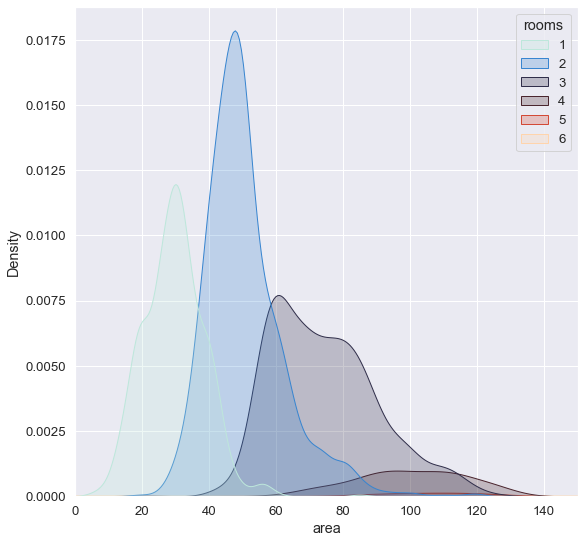

In [14]:
sns.kdeplot(data=df, x='area', hue='rooms', shade=True, palette='icefire')
plt.xlim(0,150)
plt.show()

<font size=5 color=green><b>Counting how many apartments/studios for sale/for rent</b></font>

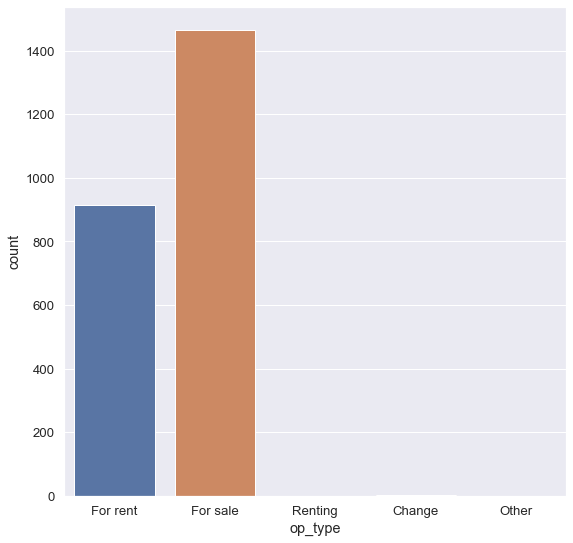

In [15]:
sns.countplot(data=df, x='op_type')
plt.show()

<font size=5 color=green><b>Pairplot to display clear relation between all columns to identify a pattern or if there is a weird behavior.</b></font>

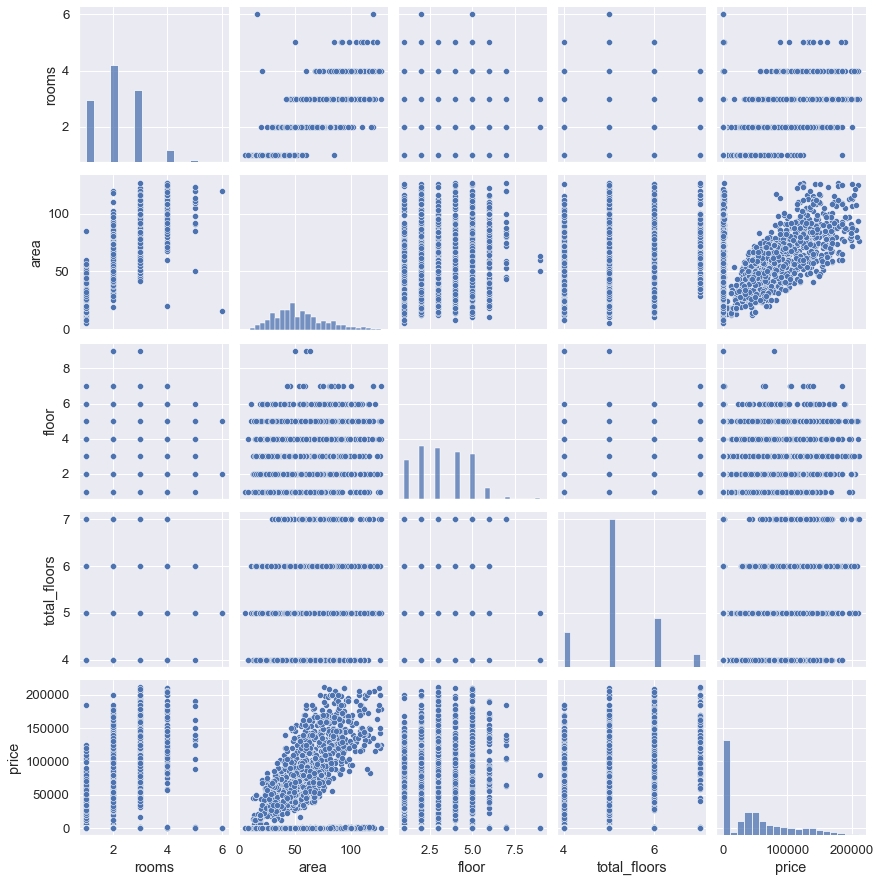

In [16]:
sns.pairplot(data=df)

<font size=5 color=green><b>After viewing the pairplot carefully, the graph between area and price looked strange. There cannot be price of 0 for any apartments being rented/sold.</b></font>

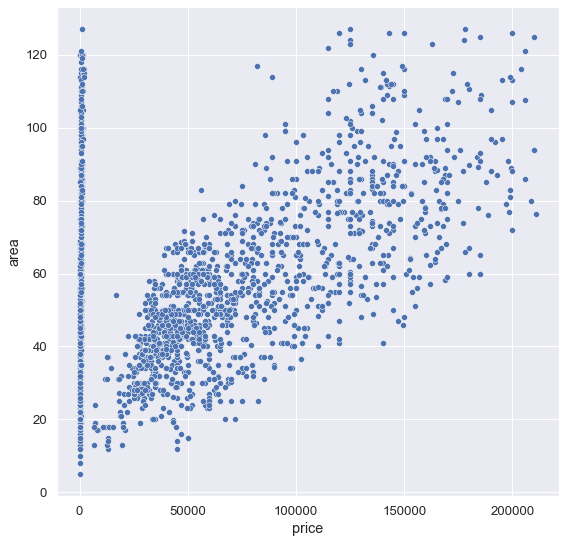

In [17]:
sns.scatterplot(x="price", y='area', data=df)
plt.show()

<font size=4 color=green><b>Looking deeper into the values of 0, looking at the column, "prices" column has no value of 0 in it, so the values represented looked a bit suspicious. After limiting values to a small portion to look into a more detailed graph with only a small amount of data, it turns out these are not values of 0 but prices ranging from 5 to 2000 which represents a major amount of the data.</b></font>

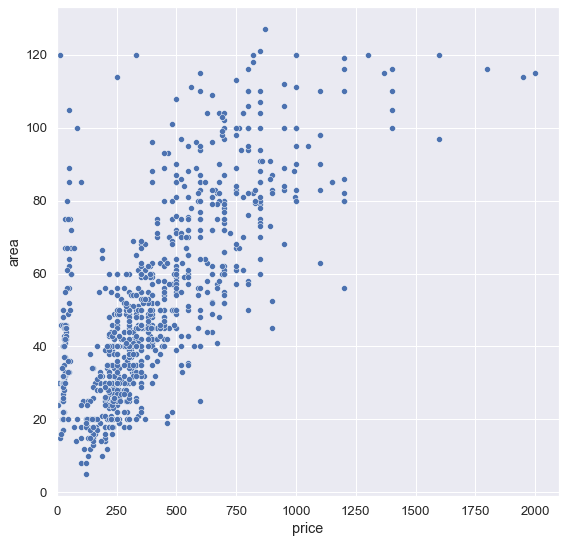

In [18]:
sns.scatterplot(x="price", y='area', data=df)
plt.xlim(0,2100)
plt.show()

In [19]:
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,All amenities,250.0
3,For sale,2,50.0,5.0,5.0,Panel,All amenities,34000.0
5,For rent,2,40.0,3.0,6.0,Masonry,All amenities,440.0
6,For sale,2,37.0,5.0,5.0,Brick,All amenities,31000.0
7,For rent,2,49.0,3.0,5.0,Panel,All amenities,240.0
...,...,...,...,...,...,...,...,...
4683,For sale,1,34.0,3.0,4.0,Brick,Partial amenities,35000.0
4684,For rent,1,30.0,4.0,5.0,Panel,All amenities,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,All amenities,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,Partial amenities,44850.0


<font size=4 color=green><b>Created a pivot table to compare 2 categorical attributes with the values being the price and aggregate function of mean, which will present me with the information of each house type and the condition of it and its price, this will give me an insight of which houses are the most expensive based on their type and condition.</b></font>

In [20]:
piv = pd.pivot_table(data = df, index= 'house_type', columns='condition', values='price',aggfunc=np.mean)
piv

condition,All amenities,Partial amenities,Without amenities
house_type,,,
Brick,36641.108499,28189.722222,39000.0
Brick-Panel,44088.109848,5570.000000,NaN
Masonry,62668.906176,12985.217391,71995.0
Panel,41253.597540,24109.166667,NaN
Panel-Brick,64345.795918,76687.500000,NaN
Wood,105500.000000,NaN,NaN


<AxesSubplot:xlabel='condition', ylabel='house_type'>

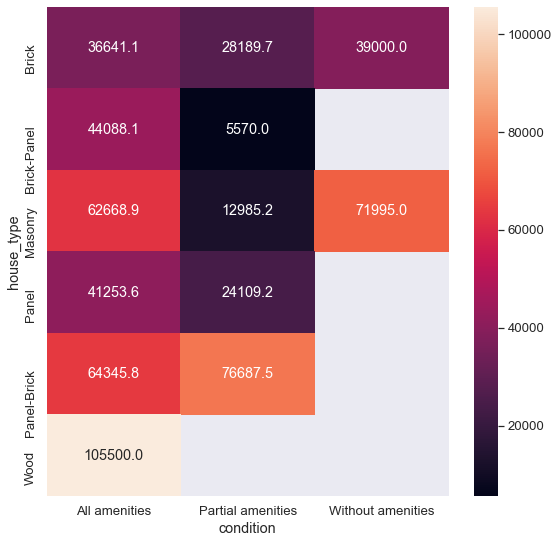

In [21]:
sns.heatmap(piv, annot=True, fmt='0.1f')

In [22]:
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,All amenities,250.0
3,For sale,2,50.0,5.0,5.0,Panel,All amenities,34000.0
5,For rent,2,40.0,3.0,6.0,Masonry,All amenities,440.0
6,For sale,2,37.0,5.0,5.0,Brick,All amenities,31000.0
7,For rent,2,49.0,3.0,5.0,Panel,All amenities,240.0
...,...,...,...,...,...,...,...,...
4683,For sale,1,34.0,3.0,4.0,Brick,Partial amenities,35000.0
4684,For rent,1,30.0,4.0,5.0,Panel,All amenities,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,All amenities,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,Partial amenities,44850.0


<font size=4 color=green><b>-In this section, after finishing the visualizations and analysis on dataset, I began dividing my dataset to identify the categorical and numerical columns.</b></font>

<font size=4 color=green><b>-Since everything else are in numbers, only thing left to be transformed is the "house_type" and "op_type" columns, needs to be transformed to numerical numbers</b></font>

In [23]:
nominal =['op_type', 'house_type']

In [24]:
df['condition'].unique()

array(['All amenities', 'Without amenities', 'Partial amenities'],
      dtype=object)

<font size=4 color=green><b>-Column "condition" is ordinal, so it needs to be transformed according to ordinal values, going from 1 to 3 as from lowest to highest</b></font>

In [25]:
condition = {
    'Without amenities':1,
    'Partial amenities':2,
    'All amenities':3
}
df['condition']= df['condition'].map(condition)
df

,op_type,rooms,area,floor,total_floors,house_type,condition,price
0,For rent,1,27.0,3.0,5.0,Brick-Panel,3,250.0
3,For sale,2,50.0,5.0,5.0,Panel,3,34000.0
5,For rent,2,40.0,3.0,6.0,Masonry,3,440.0
6,For sale,2,37.0,5.0,5.0,Brick,3,31000.0
7,For rent,2,49.0,3.0,5.0,Panel,3,240.0
...,...,...,...,...,...,...,...,...
4683,For sale,1,34.0,3.0,4.0,Brick,2,35000.0
4684,For rent,1,30.0,4.0,5.0,Panel,3,250.0
4685,For rent,1,32.0,2.0,5.0,Brick-Panel,3,180.0
4686,For sale,2,43.0,5.0,5.0,Brick,2,44850.0


<font size=4 color=green><b>-Transforming the nominal data from text to numeric values, dropping first column to remove un-necessary dimensions</b></font>

In [26]:
df = pd.get_dummies(data = df, columns=nominal, drop_first=True)
df

,rooms,area,floor,total_floors,condition,price,op_type_For rent,op_type_For sale,op_type_Other,op_type_Renting,house_type_Brick-Panel,house_type_Masonry,house_type_Panel,house_type_Panel-Brick,house_type_Wood
0,1,27.0,3.0,5.0,3,250.0,1,0,0,0,1,0,0,0,0
3,2,50.0,5.0,5.0,3,34000.0,0,1,0,0,0,0,1,0,0
5,2,40.0,3.0,6.0,3,440.0,1,0,0,0,0,1,0,0,0
6,2,37.0,5.0,5.0,3,31000.0,0,1,0,0,0,0,0,0,0
7,2,49.0,3.0,5.0,3,240.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,1,34.0,3.0,4.0,2,35000.0,0,1,0,0,0,0,0,0,0
4684,1,30.0,4.0,5.0,3,250.0,1,0,0,0,0,0,1,0,0
4685,1,32.0,2.0,5.0,3,180.0,1,0,0,0,1,0,0,0,0
4686,2,43.0,5.0,5.0,2,44850.0,0,1,0,0,0,0,0,0,0


<font size=6 color=green><b><center>====MACHINE LEARNING SECTION====</center></b></font>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<font size=4 color=green><b>-Start to split the columns to x and y, training and testing data.</b></font>

In [28]:
x = df.drop('price', axis=1)
y = df['price']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

<font size=4 color=green><b>-Use standard scalar to scale data to a specific range to reduce machine bias, where large variation in numbers could lead the machine to be biased towards certain attributes than others.</b></font>

In [30]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<font size=4 color=green><b>-Here we create a Linear regression model, add the training data to train the model and then use predict to see the results and accuracy of model.</b></font>

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(x_test)
y_pred

array([ 92135.75261573, -31361.57883508,  -7433.03552678,  11998.54042896,
        52658.98985246, -18028.06310415,  64892.32165988,  55586.5713978 ,
       140607.31494014,  73563.52567776,   6677.54943284,  98952.9862633 ,
        95172.87433141,  63800.84235119,  78141.40752334,  54441.17388255,
        39422.54816156, -16933.9106873 ,  67912.62493785, 102142.40471679,
        79445.28095947,  85822.26160339, -17376.22373092,  86592.63113518,
        82241.22278191,   9227.83398201, 116303.88364902, -13009.91895537,
       104707.68948223, -19759.08906683,  93856.35672272,  -7185.38198982,
        59613.6980638 ,  69779.23018118,  52428.33279546,  -9917.45358558,
       119946.32435134, -11598.33222457, 103590.01027653,  29476.46113538,
        45838.04270032, 118013.96491976,  49787.26980772, 120729.4250867 ,
        21268.52382507, -11380.31934014, 120642.64782974,  90063.60061827,
        48478.11395344,  25639.10665978,  54286.64617364,  57140.04166494,
        29387.45290731,  

<font size=4 color=green><b>-In the beginning I used only LinearRegression model and R2 score to identify the accuracy of the model, but the result was around 70%, which was not ideal. Here I'm using the models we've used in a previous session to see which model can have a better accuracy according to its algorithm, other models can have better accuracy than others.</b></font>

<font size=4 color=green><b>-Another addition was, I also trained the model on the training dataset, to see the difference in result between training and test data. To see if there's overfitting and underfitting or not.</b></font>


<font size=4 color=red><b>-Note: the best accuracy was the RandomForest model giving 97% accuracy in training data and 88% in test data</b></font>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(), 
    'RF': RandomForestRegressor(n_estimators=120),
    'XGB': XGBRegressor()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    print(f'Model: {name}')
    print(f'Train accuracy: {r2_score(y_train, y_pred_train)}')
    print(f'Testing Accuracy: {r2_score(y_test, y_pred)}')
    print('-'*50)

Training LR...
Model: LR
Train accuracy: 0.7158937433087864
Testing Accuracy: 0.7146605137444162
--------------------------------------------------
Training DT...
Model: DT
Train accuracy: 0.9937572127586327
Testing Accuracy: 0.7787904928889435
--------------------------------------------------
Training KNN...
Model: KNN
Train accuracy: 0.8984951954371757
Testing Accuracy: 0.8424798230295483
--------------------------------------------------
Training SVM...
Model: SVM
Train accuracy: -0.03886984598486132
Testing Accuracy: -0.03662784590448753
--------------------------------------------------
Training RF...
Model: RF
Train accuracy: 0.9769661264654294
Testing Accuracy: 0.8826977139852115
--------------------------------------------------
Training XGB...
Model: XGB
Train accuracy: 0.9764703396297643
Testing Accuracy: 0.8694781268584421
--------------------------------------------------


<font size=4 color=green><b>-In this section I tried giving the model different columns, reducing dimensions and removing op_type from the X, giving only from rooms to condition, to see if it will have better accuracy or not.</b></font>

<font size=4 color=green><b>-Conclusion: Accuracy is worse than before, therefore the omitted columns are indeed useful and necessary to produce better results.</b></font>

In [34]:
df

,rooms,area,floor,total_floors,condition,price,op_type_For rent,op_type_For sale,op_type_Other,op_type_Renting,house_type_Brick-Panel,house_type_Masonry,house_type_Panel,house_type_Panel-Brick,house_type_Wood
0,1,27.0,3.0,5.0,3,250.0,1,0,0,0,1,0,0,0,0
3,2,50.0,5.0,5.0,3,34000.0,0,1,0,0,0,0,1,0,0
5,2,40.0,3.0,6.0,3,440.0,1,0,0,0,0,1,0,0,0
6,2,37.0,5.0,5.0,3,31000.0,0,1,0,0,0,0,0,0,0
7,2,49.0,3.0,5.0,3,240.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,1,34.0,3.0,4.0,2,35000.0,0,1,0,0,0,0,0,0,0
4684,1,30.0,4.0,5.0,3,250.0,1,0,0,0,0,0,1,0,0
4685,1,32.0,2.0,5.0,3,180.0,1,0,0,0,1,0,0,0,0
4686,2,43.0,5.0,5.0,2,44850.0,0,1,0,0,0,0,0,0,0


In [35]:
x = df.iloc[:,:5]
y = df['price']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [37]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)
y_pred

array([  7617.36175219,  74926.09121148,  17056.5577046 ,  42995.8500846 ,
        60209.6913969 ,  40973.93849759,  38997.36017943,  17018.58762207,
        29540.24289248,  94438.02916734,  99829.1432771 ,  42988.48689828,
        27167.26979058,  34296.7472445 ,  21719.20055701,  55472.17208615,
        40954.95345632,  67615.35390736,  23496.59769042,  36963.82673748,
        35563.83934655,  93434.43656016,  36963.82673748,  53059.10636863,
        15004.03922138,  19033.13602276,  10616.51771879,  57485.65678012,
        23138.1729892 ,   5934.88982512,  25152.72138989,  84403.25724643,
        58866.65912978,  43660.00303184,  78347.99018942, 103665.35837334,
        40954.95345632,  62780.43774571,  37578.38774724,  21104.63954725,
        61495.76854023,  23809.68912277,  59500.2051808 ,  78359.61204436,
        38940.40505563,  85063.15152505,  89424.32480005, 121758.323897  ,
        30863.22641161,  75341.4710365 ,  83029.6180831 ,  58697.92117182,
        16366.05652977,  

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(), 
    'RF': RandomForestRegressor(n_estimators=120),
    'XGB': XGBRegressor()
}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)

Training LR...
Testing RMSE: 47075.50600027864
Testing MAE: 37394.34609134137
Testing R2: 0.2487246266265677
--------------------------------------------------
Training DT...
Testing RMSE: 57774.80060712668
Testing MAE: 37855.8484268621
Testing R2: -0.1315821028102142
--------------------------------------------------
Training KNN...
Testing RMSE: 48413.96045431815
Testing MAE: 37043.83590604027
Testing R2: 0.20539666845739346
--------------------------------------------------
Training SVM...
Testing RMSE: 55182.120095719605
Testing MAE: 42770.80410116567
Testing R2: -0.032299990806079926
--------------------------------------------------
Training RF...
Testing RMSE: 49383.29007531506
Testing MAE: 36320.598997265006
Testing R2: 0.1732595237151937
--------------------------------------------------
Training XGB...
Testing RMSE: 51177.3070586828
Testing MAE: 36462.98726273863
Testing R2: 0.11210007628097951
--------------------------------------------------
